<a href="https://colab.research.google.com/github/627Astro-mudie/627Astro-mudie1/blob/main/Task_02_Customer_Segmentatio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation Using KMeans and DBSCAN

**Objective:**  
To segment mall customers based on their **annual income** and **spending score**, in order to identify meaningful customer groups for targeted marketing strategies.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Read file
df = pd.read_csv('/content/drive/MyDrive/ML_Projects/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


As we have a column 'Genre' as text: Male and Female. We have to convert it to digits. Like 1 for Male and 0 for Female.
However, as in project description, we only care about Annual Income and Spending Score.

In [7]:
df.shape

(200, 5)

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# Scaling the features because Annual Income has larger range than Spenging score, resulting in giving it preference.
from sklearn.preprocessing import StandardScaler

# Select only two features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

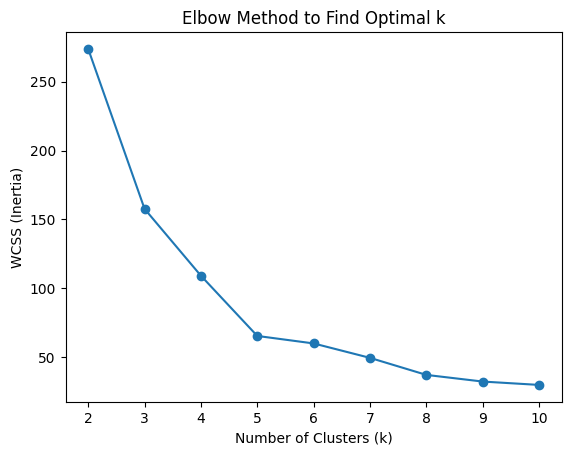

In [11]:
# Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # list to store 'within-cluster sum of squares'

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method to Find Optimal k")
plt.show()

**Optimal k=5**

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add clusters to original dataframe
df['Clusters']= cluster_labels

In [13]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


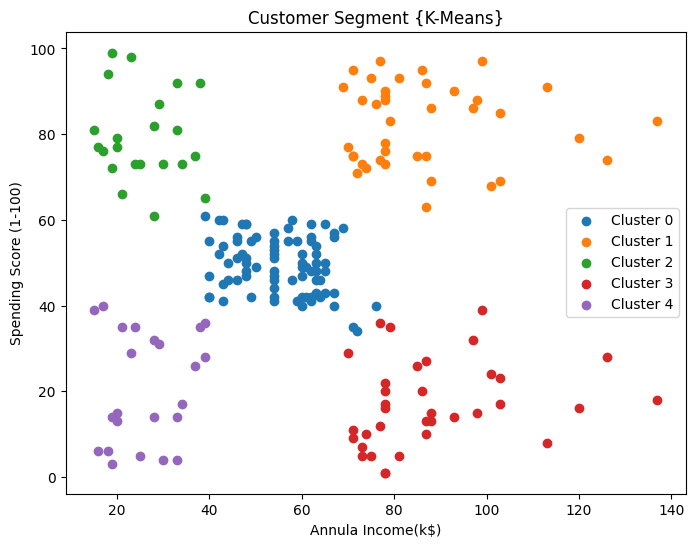

In [14]:
plt.figure(figsize=(8,6))

for i in range(5):
  plt.scatter(
      X['Annual Income (k$)'][cluster_labels==i],
      X['Spending Score (1-100)'][cluster_labels==i],
      label=f'Cluster {i}'
  )
plt.xlabel('Annula Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("Customer Segment {K-Means}")
plt.legend()
plt.show()

In [15]:
# Analyze clustes
df.groupby('Clusters')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Clusters,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


### Business Insights

- **Cluster 0 (Luxury Shoppers):** High income, high spending → Target with premium offers.
- **Cluster 1 (Savers):** High income, low spending → Encourage spending with promotions.
- **Cluster 2 (Impulsive Buyers):** Low income, high spending → Promote affordable, trendy products.
- **Cluster 3 (Thrifty):** Low income, low spending → Not main target for luxury products.
- **Cluster 4 (Average Consumers):** Moderate income, moderate spending → Stable, loyal customers.

DBSCAN confirmed clusters and highlighted noise points that don’t fit well into groups.


In [17]:
centers = kmeans.cluster_centers_
centers

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

In [18]:
# have to transform it back to original value units
original_centers = scaler.inverse_transform(centers)
original_centers

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [19]:
labels = {
    0: "Average Customers",
    1: "Premium Buyers",
    2: "Impulsive Buyers",
    3: "Saving-Oriented",
    4: "Budget Customers"
}

df['Cluster_Label'] = df['Clusters'].map(labels)


In [20]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters,Cluster_Label
0,1,Male,19,15,39,4,Budget Customers
1,2,Male,21,15,81,2,Impulsive Buyers
2,3,Female,20,16,6,4,Budget Customers
3,4,Female,23,16,77,2,Impulsive Buyers
4,5,Female,31,17,40,4,Budget Customers
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,Premium Buyers
196,197,Female,45,126,28,3,Saving-Oriented
197,198,Male,32,126,74,1,Premium Buyers
198,199,Male,32,137,18,3,Saving-Oriented


In [21]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)   # you can tune eps and min_samples
db_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN clusters to dataframe
df['DBSCAN_Cluster'] = db_labels

# Check how many clusters it found
print("Clusters found by DBSCAN:", set(db_labels))


Clusters found by DBSCAN: {np.int64(0), np.int64(1), np.int64(-1)}


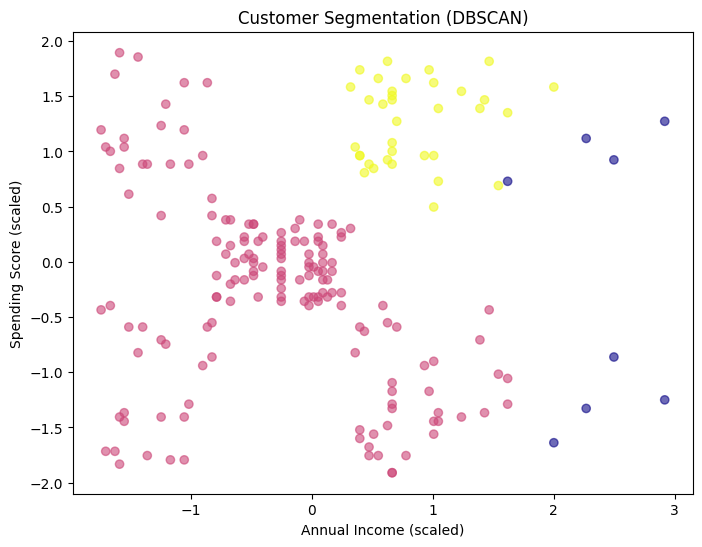

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=db_labels, cmap='plasma', alpha=0.6)
plt.title("Customer Segmentation (DBSCAN)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()


In [23]:
# KMeans clusters average
print("KMeans Clusters Average:")
print(df.groupby('Clusters')[['Annual Income (k$)','Spending Score (1-100)']].mean())

# DBSCAN clusters average
print("\nDBSCAN Clusters Average:")
print(df.groupby('DBSCAN_Cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean())


KMeans Clusters Average:
          Annual Income (k$)  Spending Score (1-100)
Clusters                                            
0                  55.296296               49.518519
1                  86.538462               82.128205
2                  25.727273               79.363636
3                  88.200000               17.114286
4                  26.304348               20.913043

DBSCAN Clusters Average:
                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
-1                      122.750000               46.875000
 0                       52.490446               43.101911
 1                       82.542857               82.800000


### Conclusion
- KMeans successfully segmented mall customers into 5 groups.  
- DBSCAN provided an alternative perspective, identifying noise/outliers.  
- These insights can guide marketing strategies, such as personalized promotions and targeted campaigns.
